- Assumes the image being worked with  is in the same directory
- Will continue working on refining the edges and excluding the sample label

In [111]:
import SimpleITK as sitk

import numpy as np
import os
from ipywidgets import interact, fixed, IntSlider

%matplotlib inline
import matplotlib.pyplot as plt

OUTPUT_DIR = 'output'

image_viewer = sitk.ImageViewer()

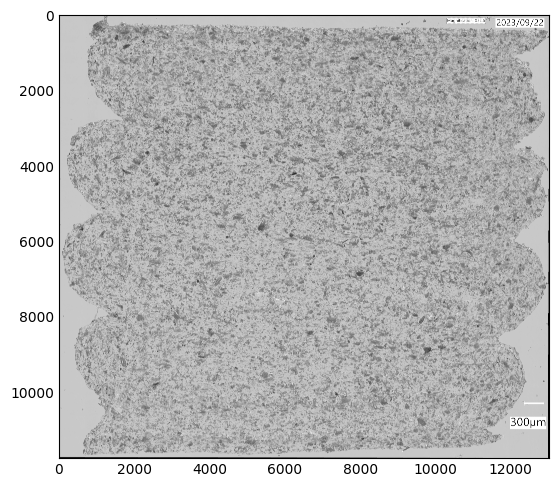

In [112]:
image_name = "04_060__150_00_01_00C_230922_2D.jpg"
image = sitk.Cast(sitk.ReadImage( image_name , sitk.sitkUInt8),sitk.sitkFloat32 )

plt.figure(figsize=(5, 5))
plt.style.use('_mpl-gallery-nogrid')
plt.imshow(sitk.GetArrayViewFromImage(image), cmap=plt.cm.Greys_r)
plt.axis('on');

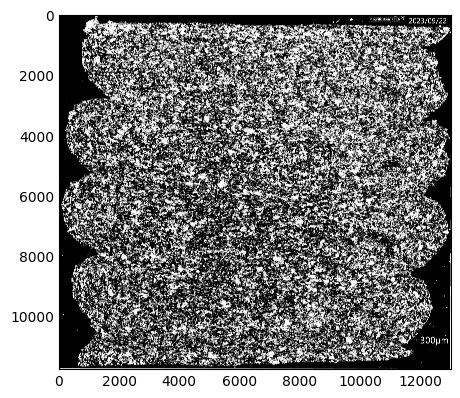

In [113]:
threshold_value = 140
binary_image = sitk.BinaryThreshold(image, lowerThreshold=threshold_value, upperThreshold=255, insideValue=0, outsideValue=255)

plt.figure(figsize=(4, 4))
plt.style.use('_mpl-gallery-nogrid')
plt.imshow(sitk.GetArrayViewFromImage(binary_image), cmap=plt.cm.Greys_r)
plt.axis('on');

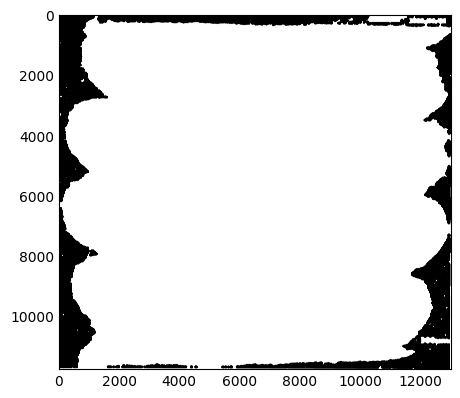

In [114]:
close_filter = sitk.BinaryMorphologicalClosingImageFilter()
close_filter.SetKernelRadius([50, 50, 50])
close_filter.SetForegroundValue(255)

closed_image = close_filter.Execute(binary_image)

plt.figure(figsize=(4, 4))
plt.style.use('_mpl-gallery-nogrid')
plt.imshow(sitk.GetArrayViewFromImage(closed_image), cmap=plt.cm.Greys_r)
plt.axis('on');


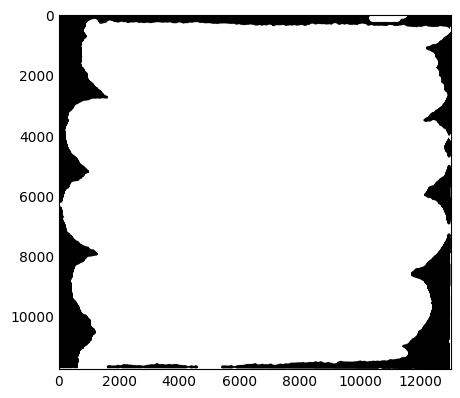

In [115]:
close_filter = sitk.BinaryMorphologicalClosingImageFilter()
close_filter.SetKernelRadius([125, 125, 125])
close_filter.SetForegroundValue(0)

opened_image = close_filter.Execute(closed_image)

plt.figure(figsize=(4, 4))
plt.style.use('_mpl-gallery-nogrid')
plt.imshow(sitk.GetArrayViewFromImage(opened_image), cmap=plt.cm.Greys_r)
plt.axis('on');

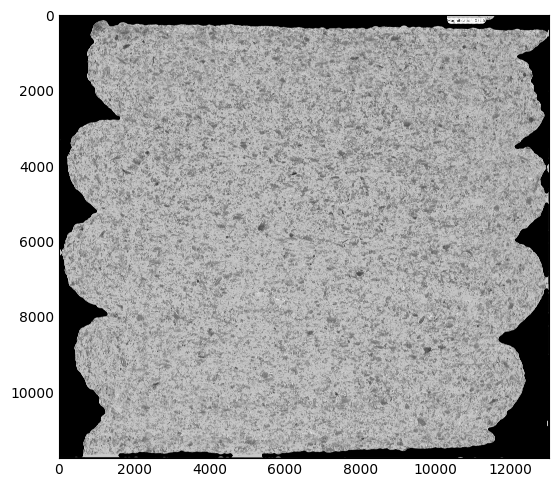

In [116]:
input_image = image
mask_image = opened_image

mask_filter = sitk.MaskImageFilter()
#mask_filter.SetOutsideValue(255) uncomment to make mask white instead of black

masked_image = mask_filter.Execute(input_image, mask_image)

plt.figure(figsize=(5, 5))
plt.style.use('_mpl-gallery-nogrid')
plt.imshow(sitk.GetArrayViewFromImage(masked_image), cmap=plt.cm.Greys_r)
plt.axis('on');
